In [23]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

In [2]:
#importar el csv y imprimir las primeras 5 lineas
datos = pd.read_csv('movies.csv')

In [3]:
# data cleaning
datos.drop_duplicates(keep='first')
#drop id column
datos = datos.drop('id', 1) 
#change releaseDate to datime format
datos['releaseDate'] = datos['releaseDate'].str.replace('-','/')
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], infer_datetime_format=True)

C:\Users\Juan\AppData\Local\Temp\ipykernel_19148\3144686012.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datos = datos.drop('id', 1)


In [ ]:
datos.head()

# Explicacion rapida de los datos

In [ ]:
#informacion general sobre los datos
datos.info()

In [ ]:
#distribicion de los datos en el csv
datos.nunique()

In [ ]:
#informcacion sobre el tipo de datos
datos.dtypes

# Tipos de Variables

In [ ]:
#distribucion variables categoricas
datos.describe(include=["O"]).transpose()

In [ ]:
#distribucion variables numericas
datos.describe().transpose()

# Distribucion de las variables cuantitativas y sus tablas de frecuencias

### Distribucion normal de las variables

Text(0.5, 1.0, 'actorsAmount histogram')

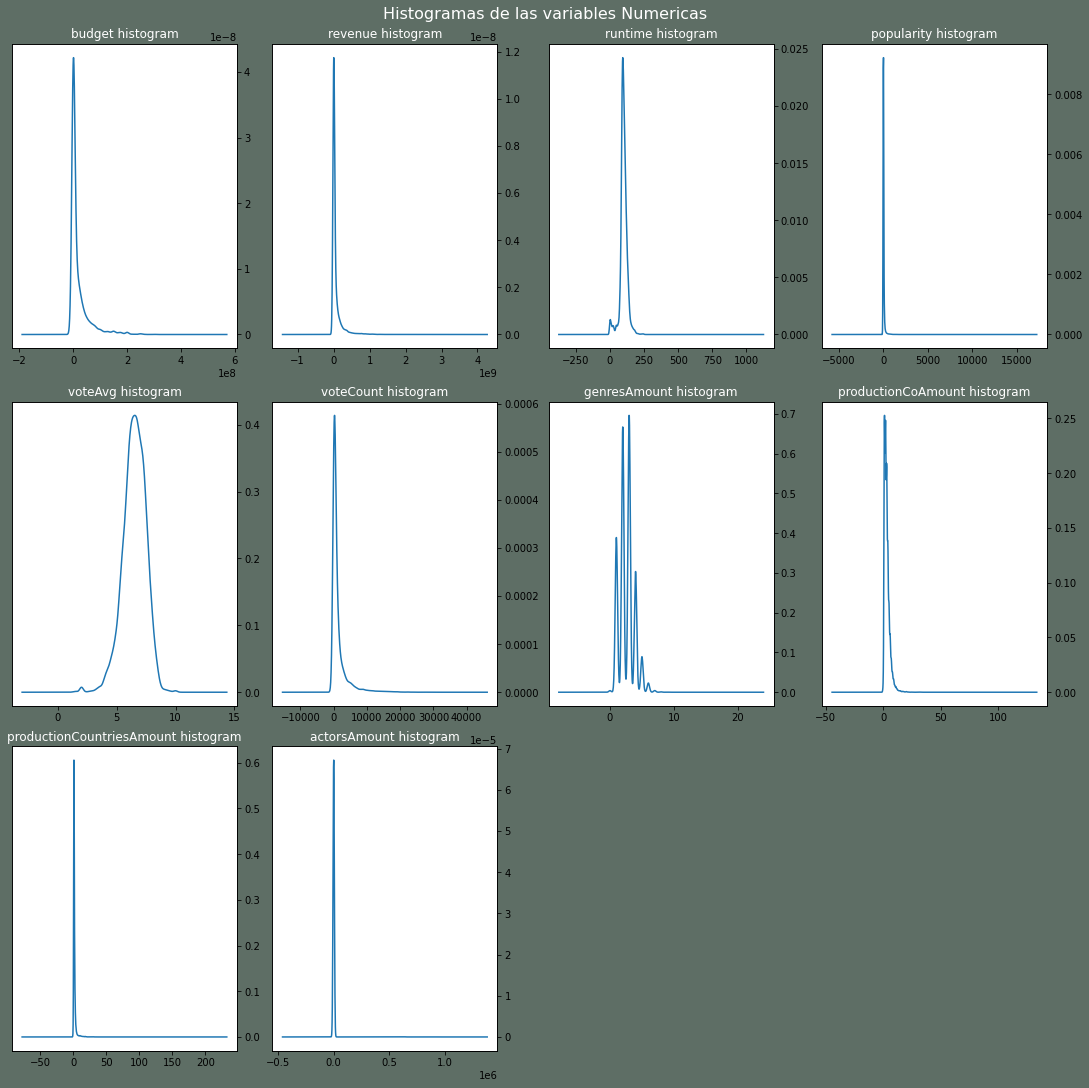

In [19]:
fig = plt.figure(figsize=(15,15),constrained_layout=True)
gs = fig.add_gridspec(nrows=3,ncols=4)
fig.set_facecolor('#5e6e65')

fig.suptitle('Histogramas de las variables Numericas', fontsize=16, color='w')

ax1 = fig.add_subplot(gs[0,0])
#ax1.hist(datos.budget)
datos.budget.plot.kde(ax=ax1,secondary_y=True)
ax1.set_title('budget histogram',color='w')

ax2 = fig.add_subplot(gs[0,1])
#ax2.hist(datos.revenue)
datos.revenue.plot.kde(ax=ax2,secondary_y=True)
ax2.set_title('revenue histogram',color='w')

ax3 = fig.add_subplot(gs[0,2])
#ax3.hist(datos.runtime)
datos.runtime.plot.kde(ax=ax3,secondary_y=True)
ax3.set_title('runtime histogram',color='w')

ax4 = fig.add_subplot(gs[0,3])
#ax4.hist(datos.popularity)
datos.popularity.plot.kde(ax=ax4,secondary_y=True)
ax4.set_title('popularity histogram',color='w')

ax5 = fig.add_subplot(gs[1,0])
#ax5.hist(datos.voteAvg)
datos.voteAvg.plot.kde(ax=ax5,secondary_y=True)
ax5.set_title('voteAvg histogram',color='w')

ax6 = fig.add_subplot(gs[1,1])
#ax6.hist(datos.voteCount)
datos.voteCount.plot.kde(ax=ax6,secondary_y=True)
ax6.set_title('voteCount histogram',color='w')

ax7 = fig.add_subplot(gs[1,2])
#ax7.hist(datos.genresAmount)
datos.genresAmount.plot.kde(ax=ax7,secondary_y=True)
ax7.set_title('genresAmount histogram',color='w')

ax8 = fig.add_subplot(gs[1,3])
#ax8.hist(datos.productionCoAmount)
datos.productionCoAmount.plot.kde(ax=ax8,secondary_y=True)
ax8.set_title('productionCoAmount histogram',color='w')

ax9 = fig.add_subplot(gs[2,0])
#ax9.hist(datos.productionCountriesAmount)
datos.productionCountriesAmount.plot.kde(ax=ax9,secondary_y=True)
ax9.set_title('productionCountriesAmount histogram',color='w')

ax10 = fig.add_subplot(gs[2,1])
#ax10.hist(datos.actorsAmount)
datos.actorsAmount.plot.kde(ax=ax10,secondary_y=True)
ax10.set_title('actorsAmount histogram',color='w')

#ax11 = fig.add_subplot(gs[2,0])
#ax11.hist(df.horsepower)
#df.horsepower.plot.kde(ax=ax11,secondary_y=True)
#ax11.set_title('horsepower histogram',color='w')

#ax12 = fig.add_subplot(gs[2,1])
#ax12.hist(df.peak_rpm)
#df.peak_rpm.plot.kde(ax=ax12,secondary_y=True)
#ax12.set_title('peak_rpm histogram',color='w')

### Tablas de Frecuencias

In [ ]:
datos.budget.value_counts().to_frame().transpose()

In [ ]:
datos.revenue.value_counts().to_frame().transpose()

In [ ]:
datos.runtime.value_counts().to_frame().transpose()

In [ ]:
datos.popularity.value_counts().to_frame().transpose()

In [ ]:
datos.voteAvg.value_counts().to_frame().transpose()

In [ ]:
datos.voteCount.value_counts().to_frame().transpose()

In [ ]:
datos.genresAmount.value_counts().to_frame().transpose()

In [ ]:
datos.productionCoAmount.value_counts().to_frame().transpose()

In [ ]:
datos.productionCountriesAmount.value_counts().to_frame().transpose()

In [ ]:
datos.actorsAmount.value_counts().to_frame().transpose()

## ojo al tejo

<AxesSubplot:>

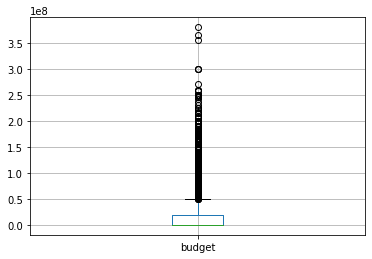

In [20]:
datos[["budget"]].boxplot()

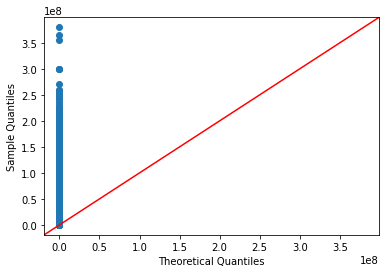

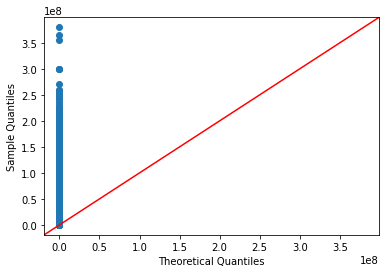

In [24]:
sm.qqplot(datos[['budget']],line='45')

# Ejercicio 4

## ¿Cuáles son las 10 películas que contaron con más presupuesto? 

In [ ]:
budgetTop = datos.sort_values(by='budget', ascending=False).reset_index(drop=True)
budgetTop = budgetTop.filter(['title','budget'],axis=1)
budgetTop.head(n=10)

### ¿Cuáles son las 10 películas que más ingresos tuvieron? 

In [ ]:
revenueTop = datos.sort_values(by='revenue', ascending=False).reset_index(drop=True)
revenueTop = revenueTop.filter(['title','revenue'],axis=1)
revenueTop.head(n=10)

### ¿Cuál es la película que más votos tuvo? 

In [ ]:
voteCount = datos.sort_values(by='voteCount', ascending=False).reset_index(drop=True)
voteCount = voteCount.filter(['title','voteCount'],axis=1)
voteCount.head(n=1)

### ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? 

In [ ]:
#DUDA
voteAvgCount = datos.sort_values(by='voteAvg', ascending=True).reset_index(drop=True)
voteAvgCount = voteAvgCount.filter(['title','voteAvg'],axis=1)
voteAvgCount.head(n=1)

### ¿Cuántas  películas  se  hicieron  en  cada  año?

Text(0.5, 0, 'Year')

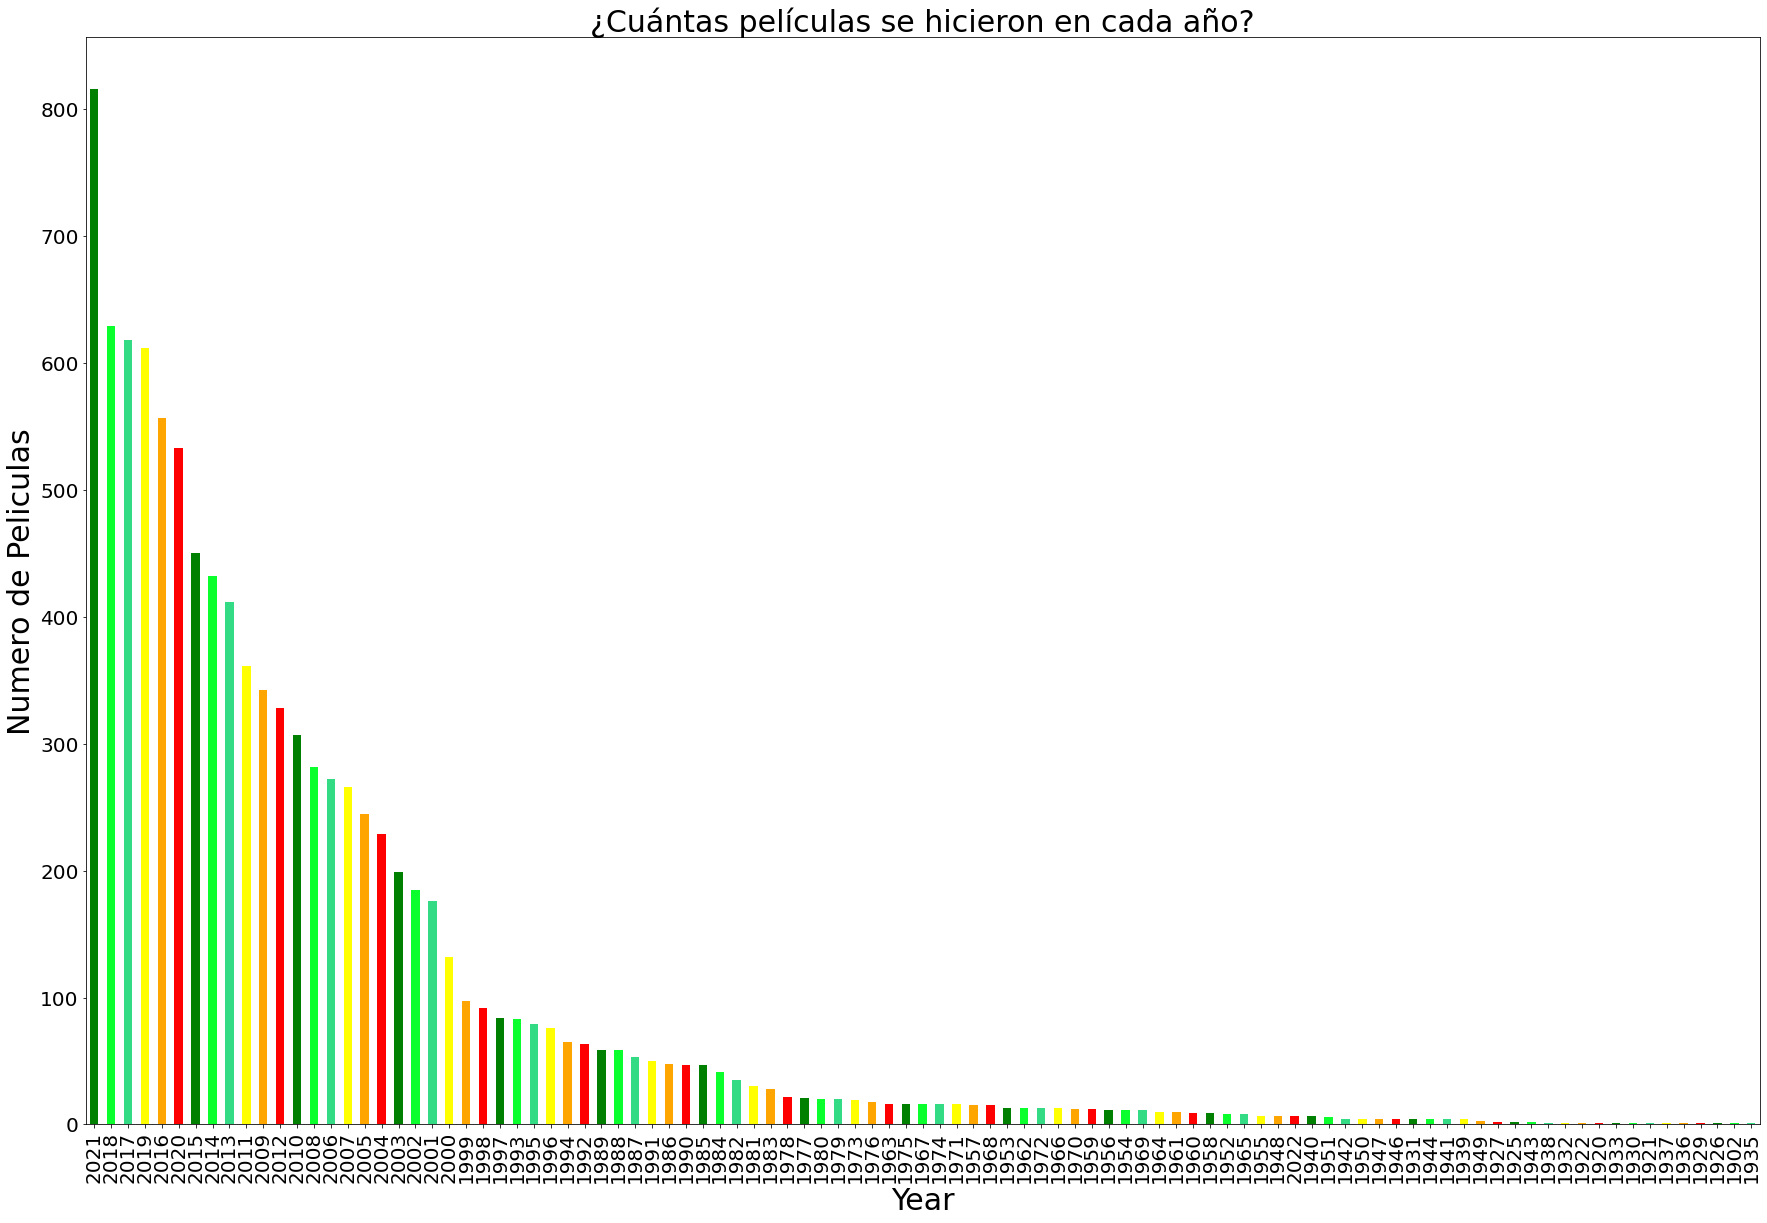

In [18]:
#creating new dataframe just in case
yearData= datos.copy()
yearData['releaseDate'] = pd.DatetimeIndex(yearData['releaseDate']).year
#yearData.releaseDate.value_counts().to_frame().transpose()
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = yearData.releaseDate.value_counts().plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('¿Cuántas películas se hicieron en cada año?',fontsize=30)
plt.ylabel('Numero de Peliculas',fontsize=30)
plt.xlabel('Year',fontsize=30)

In [14]:
yearData.releaseDate.value_counts().to_frame().transpose()

,2021,2018,2017,2019,2016,2020,2015,2014,2013,2011,...,1920,1933,1930,1921,1937,1936,1929,1926,1902,1935
releaseDate,816,629,618,612,557,533,450,432,412,361,...,1,1,1,1,1,1,1,1,1,1
